<a href="https://colab.research.google.com/github/PDTCCLF/INF1032/blob/main/INF1032_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm
import scipy.stats as stats
import matplotlib.patches as mpatches

drive_path = 'Database/'
contents = os.listdir(drive_path)

for dirname, _, filenames in os.walk(drive_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('/CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [37]:
#Alcohol_Consumption

print("Min:" + str(df["Alcohol_Consumption"].min()) + "\tMax:" + str(df["Alcohol_Consumption"].max()))

Min:0.0	Max:30.0


## Há diferenças significativas entre homens e mulheres em relação a doenças cardiovasculares?

In [38]:
#Recolhendo numero de homens e mulheres totais
totalH = len(df.query('Sex == "Male"'))
totalM = len(df.query('Sex == "Female"'))
print("Total de homens: \t", totalH)
print("Total de mulheres: \t", totalM)

Total de homens: 	 148658
Total de mulheres: 	 160196


In [39]:
#Recolher a porcentagem de homens e mulheres que possuem doenças cardiovasculares
homemCVD = df.query('Sex == "Male" and Heart_Disease == "Yes"')
mulherCVD = df.query('Sex == "Female" and Heart_Disease == "Yes"')
print("Homens com CVD: \t",len(homemCVD),"=>",format(len(homemCVD)/totalH*100,'.2f'),"%")
print("Mulheres com CVD: \t",len(mulherCVD),"=>",format(len(mulherCVD)/totalM*100,'.2f'),"%")

Homens com CVD: 	 15073 => 10.14 %
Mulheres com CVD: 	 9898 => 6.18 %


#### Utilizando odds ratio:

In [40]:
OR = (len(homemCVD)/totalH)/(len(mulherCVD)/totalM)
print("Odds Ratio: \t\t",format(OR,'.2f'))
print("Homens tem 64% chances de ter CVD do que mulheres")

Odds Ratio: 		 1.64
Homens tem 64% chances de ter CVD do que mulheres


#### Usando sobreposição de gráficos em barra:

In [41]:
def graficoAgeCVD(tabela):
    '''Funcao que retorna um grafico de barras com a quantidade de pessoas em cada categoria de idade a partir de uma tabela'''
    keys = sorted(pd.unique(tabela["Age_Category"]))
    values = {}
    for key in keys:
        values[key] = len(tabela.query('Age_Category == @key'))
    fig = plt.figure(figsize=(10,5))
    a,b = (zip(*values.items()))
    return list(a), list(b)

<Figure size 1000x500 with 0 Axes>

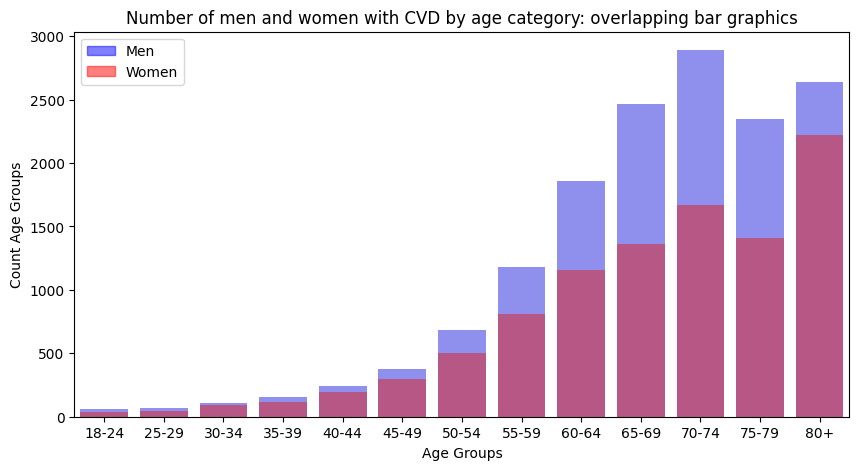

In [42]:
#CALCULO PARA MULHERES
womenAgeGroup, womenCountAge = graficoAgeCVD(mulherCVD)

#CALCULO PARA HOMENS
menAgeGroup, menCountAge = graficoAgeCVD(homemCVD)

#COLUNAS
ax=sns.barplot(x=menAgeGroup,y=menCountAge,color = 'blue', alpha = 0.5)
ax=sns.barplot(x=womenAgeGroup,y=womenCountAge,color = 'red', alpha = 0.5)

#RENOMEANDO DETALHES
plt.title("Number of men and women with CVD by age category: overlapping bar graphics")
ax.set(xlabel="Age Groups", ylabel="Count Age Groups")
bluepat = mpatches.Patch(color='blue',label= 'Men',alpha = 0.5)
redpat = mpatches.Patch(color='red',label= 'Women',alpha = 0.5)
plt.legend(handles=[bluepat,redpat],loc='upper left')

plt.show()


## Como diferentes comorbidades afetam o risco de contrair doenças cardiovasculares?

#### Utilizando um histograma:

In [43]:
def graficoDiseaseCVD(tabela):
    '''Funcao que retorna um grafico de barras com a quantidade de pessoas em cada categoria de idade a partir de uma tabela'''
    keys = ["Skin_Cancer","Other_Cancer","Depression","Diabetes","Arthritis"]
    values = {}
    for key in keys:
        values[key] = len(tabela.query(f'{key} == "Yes"'))
    fig = plt.figure(figsize=(7,5))
    a,b = (zip(*values.items()))
    return list(a), list(b)

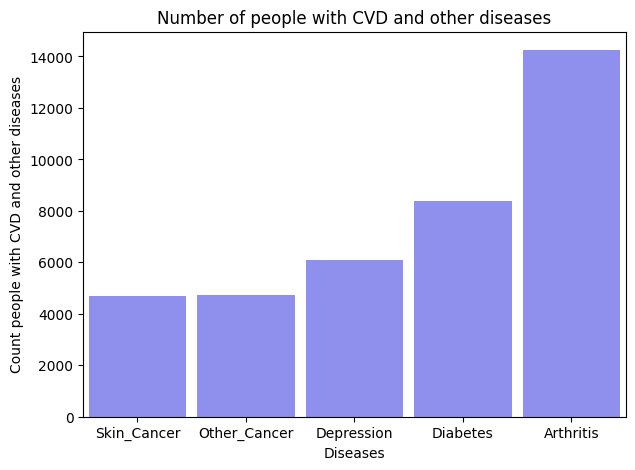

In [44]:
CVDDisease, countCVDDisease = graficoDiseaseCVD(df.query('Heart_Disease == "Yes"'))
ax=sns.barplot(x=CVDDisease,y=countCVDDisease,color = 'blue', alpha = 0.5, width=0.9)
plt.title("Number of people with CVD and other diseases")
ax.set(xlabel="Diseases", ylabel="Count people with CVD and other diseases")

plt.show()

## Como a atividade física afeta o risco de doenças cardiovasculares?

In [45]:
totalCVD = len(df.query('Heart_Disease == "Yes"'))
exercicioS = len(df.query('Heart_Disease == "Yes" and Exercise == "Yes"'))
exercicioN = len(df.query('Heart_Disease == "Yes" and Exercise == "No"'))

print(f'CVD total: {totalCVD}')
print(f'CVD que malham: {exercicioS} ')
print(f'CVD que NÃO malham: {exercicioN} ')

pMalham =  exercicioS/totalCVD
pMalhamN =  exercicioN/totalCVD

print(f'Porcentagem CVD que malham: {pMalham * 100 :.1f}%')
print(f'Porcentagem CVD que NÃO malham: {pMalhamN*100:.1f}%')

CVD total: 24971
CVD que malham: 15967 
CVD que NÃO malham: 9004 
Porcentagem CVD que malham: 63.9%
Porcentagem CVD que NÃO malham: 36.1%


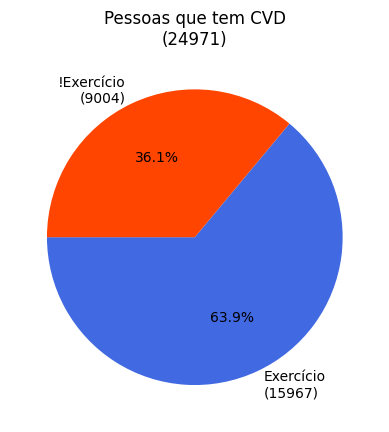

In [46]:
labelsCVD = [f'Exercício\n({exercicioS})', f'!Exercício\n({exercicioN})']
sizesCVD = [pMalham, pMalhamN]

fig, ax = plt.subplots()
ax.set_title(f'Pessoas que tem CVD\n({totalCVD})')
ax.pie(sizesCVD, labels=labelsCVD, autopct='%1.1f%%', colors = ["royalblue", "orangered"], startangle=180)
plt.show()

In [47]:
totalExercicio = len(df.query('Exercise == "Yes"'))
CVDsim = len(df.query('Heart_Disease == "Yes" and Exercise == "Yes"'))
CVDnao = len(df.query('Heart_Disease == "No" and Exercise == "Yes"'))

print(f'Total de pessoas que se exercitam: {totalExercicio}')
print(f'Exercicio e CVD: {CVDsim} ')
print(f'Exercicio sem CVD: {CVDnao}')

pCVDsim = CVDsim / totalExercicio *100
pCVDnao = CVDnao / totalExercicio *100

print(f'Porcentagem que malham e tem CVD: {pCVDsim :.1f}%')
print(f'Porcentagem que malham e NÃO tem CVD: {pCVDnao :.1f}%')

Total de pessoas que se exercitam: 239381
Exercicio e CVD: 15967 
Exercicio sem CVD: 223414
Porcentagem que malham e tem CVD: 6.7%
Porcentagem que malham e NÃO tem CVD: 93.3%


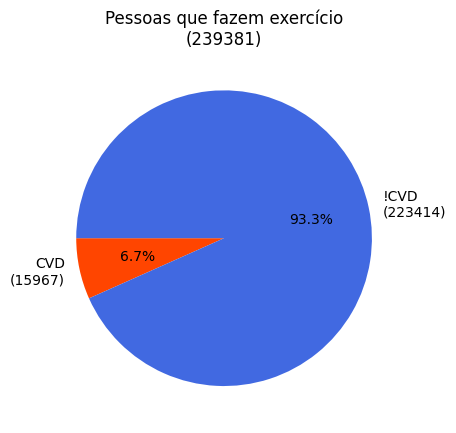

In [48]:
labelsExercicio = [f'CVD\n({CVDsim})', f'!CVD\n({CVDnao})']
sizesExercicio = [pCVDsim, pCVDnao]

fig, ax = plt.subplots()
ax.set_title(f'Pessoas que fazem exercício\n({totalExercicio})')
ax.pie(sizesExercicio, labels=labelsExercicio, autopct='%1.1f%%', colors = ["orangered", "royalblue"], startangle=180)
plt.show()

In [49]:
#Análise General Health
GHpoor = len(df.query('General_Health == "Poor"'))
GHfair = len(df.query('General_Health == "Fair"'))
GHgood = len(df.query('General_Health == "Good"'))
GHverygood = len(df.query('General_Health == "Very Good"'))
GHexcellent = len(df.query('General_Health == "Excellent"'))

#Estatística de exercícios General_Health == "Poor"
poorE = len(df.query('General_Health == "Poor" and Exercise == "Yes"'))
poorNE = len(df.query('General_Health == "Poor" and Exercise == "No"'))

ppoorE = poorE / GHpoor * 100
ppoorNE = poorNE / GHpoor * 100

print(f'Poor General Health que fazem exercício: {ppoorE :.1f}')
print(f'Poor General Health que NÃO fazem exercício: {ppoorNE:.1f}\n')

#Estatística de exercícios General_Health == "Fair"

fairE = len(df.query('General_Health == "Fair" and Exercise == "Yes"'))
fairNE = len(df.query('General_Health == "Fair" and Exercise == "No"'))

pfairE = fairE / GHfair * 100
pfairNE = fairNE / GHfair * 100

print(f'Fair General Health que fazem exercício: {pfairE :.1f}')
print(f'Fair General Health que NÃO fazem exercício: {pfairNE :.1f}\n')

#Estatística de exercícios General_Health == "Good"
goodE = len(df.query('General_Health == "Good" and Exercise == "Yes"'))
goodNE = len(df.query('General_Health == "Good" and Exercise == "No"'))

pgoodE = goodE / GHgood * 100
pgoodNE = goodNE / GHgood * 100

print(f'Good General Health que fazem exercício: {pgoodE :.1f}')
print(f'Good General Health que NÃO fazem exercício: {pgoodNE :.1f}\n')

#Estatística de exercícios General_Health == "Very Good"
verygoodE = len(df.query('General_Health == "Very Good" and Exercise == "Yes"'))
verygoodNE = len(df.query('General_Health == "Very Good" and Exercise == "No"'))

pverygoodE = verygoodE / GHverygood * 100
pverygoodNE = verygoodNE / GHverygood * 100

print(f'Very Good General Health que fazem exercício: {pverygoodE :.1f}')
print(f'Very Good General Health que NÃO fazem exercício: {pverygoodNE :.1f}\n')

#Estatística de exercícios General_Health == "Excellent"
excellentE = len(df.query('General_Health == "Excellent" and Exercise == "Yes"'))
excellentNE = len(df.query('General_Health == "Excellent" and Exercise == "No"'))

pexcellentE = excellentE / GHexcellent * 100
pexcellentNE = excellentNE / GHexcellent * 100

print(f'Excellent General Health que fazem exercício: {pexcellentE*100 :.1f}')
print(f'Excellent General Health que NÃO fazem exercício: {pexcellentNE*100 :.1f}\n')

Poor General Health que fazem exercício: 39.4
Poor General Health que NÃO fazem exercício: 60.6

Fair General Health que fazem exercício: 57.8
Fair General Health que NÃO fazem exercício: 42.2

Good General Health que fazem exercício: 74.0
Good General Health que NÃO fazem exercício: 26.0

Very Good General Health que fazem exercício: 85.2
Very Good General Health que NÃO fazem exercício: 14.8

Excellent General Health que fazem exercício: 8873.7
Excellent General Health que NÃO fazem exercício: 1126.3



In [50]:
#Análise General Health VS. CVD
#Estatística de exercícios General_Health == "Poor"
poorCVDE = len(df.query('General_Health == "Poor" and Exercise == "Yes" and Heart_Disease == "Yes"'))
ppoorCVDE = poorCVDE/GHpoor*100

#Estatística de exercícios General_Health == "Fair"

fairCVDE = len(df.query('General_Health == "Fair" and Exercise == "Yes"and Heart_Disease == "Yes"'))
pfairCVDE = fairCVDE/GHfair*100

#Estatística de exercícios General_Health == "Good"
goodCVDE = len(df.query('General_Health == "Good" and Exercise == "Yes"and Heart_Disease == "Yes"'))
pgoodCVDE = goodCVDE/GHgood*100


#Estatística de exercícios General_Health == "Very Good"
verygoodCVDE = len(df.query('General_Health == "Very Good" and Exercise == "Yes"and Heart_Disease == "Yes"'))
pverygoodCVDE = verygoodCVDE/GHverygood*100


#Estatística de exercícios General_Health == "Excellent"
excellentCVDE = len(df.query('General_Health == "Excellent" and Exercise == "Yes"and Heart_Disease == "Yes"'))
pexcellentCVDE = excellentCVDE/GHexcellent*100

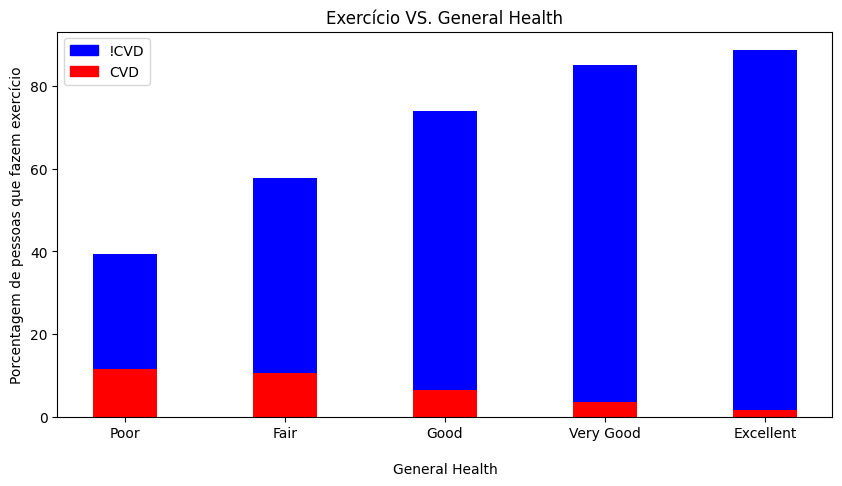

In [51]:
dataGHE = {'Poor':ppoorE, 'Fair':pfairE, 'Good':pgoodE, 'Very Good':pverygoodE, 'Excellent':pexcellentE}
dataGHECVD = {'Poor':ppoorCVDE, 'Fair':pfairCVDE, 'Good':pgoodCVDE, 'Very Good':pverygoodCVDE, 'Excellent':pexcellentCVDE}

GH = list(dataGHE.keys())
valuesGH = list(dataGHE.values())

GHCVD = list(dataGHECVD.keys())
valuesGHCVD = list(dataGHECVD.values())

fig = plt.figure(figsize = (10, 5))

## AJUSTAR AS LABELS!!
bluepat = mpatches.Patch(color='blue',label= '!CVD',alpha = 1)
redpat = mpatches.Patch(color='red',label= 'CVD',alpha = 1)
plt.legend(handles=[bluepat,redpat],loc='upper left')

plt.bar(GH, valuesGH, color ='blue', width = 0.4)
plt.bar(GHCVD, valuesGHCVD, color ='red', width = 0.4)
plt.xlabel("\nGeneral Health")
plt.ylabel("Porcentagem de pessoas que fazem exercício")
plt.title("Exercício VS. General Health")
plt.show()

In [52]:
#Análise pessoas sem CVD

NCVDtotal = len(df.query('Heart_Disease == "No"'))
NCVDexercicioS = len(df.query('Heart_Disease == "No" and Exercise == "Yes"'))
NCVDexercicioN = len(df.query('Heart_Disease == "No" and Exercise == "No"'))

pNCVDexercicioS = NCVDexercicioS/NCVDtotal*100
pNCVDexercicioN = NCVDexercicioN/NCVDtotal*100

print(f'Porcentagem de saudáveis que fazem exercício: {pNCVDexercicioS:.1f}%')
print(f'Porcentagem de saudáveis que NÃo fazem exercício: {pNCVDexercicioN:.1f}%')

Porcentagem de saudáveis que fazem exercício: 78.7%
Porcentagem de saudáveis que NÃo fazem exercício: 21.3%


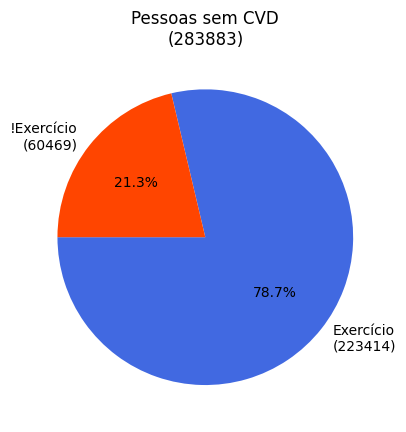

In [53]:
labelsNCVD= [f'Exercício\n({NCVDexercicioS})', f'!Exercício\n({NCVDexercicioN})']
sizesNCVD = [pNCVDexercicioS, pNCVDexercicioN]

fig, ax = plt.subplots()
ax.set_title(f'Pessoas sem CVD\n({NCVDtotal})')
ax.pie(sizesNCVD, labels=labelsNCVD, autopct='%1.1f%%', colors = ["royalblue", "orangered"], startangle=180)
plt.show()

In [54]:
#Análise pessoas que não malham

NEtotal = len(df.query('Exercise == "No"'))
NEcvdS = len(df.query('Exercise == "No" and Heart_Disease == "Yes"'))
NEcvdN= len(df.query('Exercise == "No" and Heart_Disease == "No"'))

pNEcvdS = NEcvdS / NEtotal  * 100
pNEcvdN = NEcvdN / NEtotal * 100

print(f'Porcentagem não fazem exercício e tem CVD: {pNEcvdS:.1f}%')
print(f'Porcentagem não fazem exercício e NÃO tem CVD: {pNEcvdN:.1f}%')

Porcentagem não fazem exercício e tem CVD: 13.0%
Porcentagem não fazem exercício e NÃO tem CVD: 87.0%


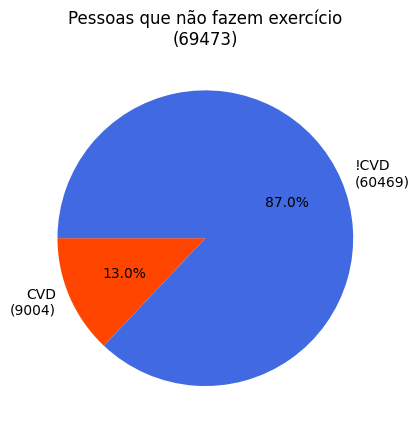

In [55]:
labelsNE= [f'CVD\n({NEcvdS})', f'!CVD\n({NEcvdN})']
sizesNE = [pNEcvdS, pNEcvdN]

fig, ax = plt.subplots()
ax.set_title(f'Pessoas que não fazem exercício\n({NEtotal})')
ax.pie(sizesNE, labels=labelsNE, autopct='%1.1f%%', colors = ["orangered", "royalblue"], startangle=180)
plt.show()

## Quais medidas preventivas podem ser adotadas com base nos modelos de predição de risco?

## Quais são os recursos e alertas que podemos fornecer aos usuários com base nas previsões de risco?